# Проект по SQL
Ваша компания решила быть на волне и купила крупный сервис для чтения книг по подписке. Ваша первая задача как аналитика — проанализировать базу данных. В ней — информация о книгах, издательствах, авторах, а также пользовательские обзоры книг. Эти данные помогут сформулировать ценностное предложение для нового продукта.
# Описание данных
**Таблица books**
Содержит данные о книгах:
book_id — идентификатор книги;
author_id — идентификатор автора;
title — название книги;
num_pages — количество страниц;
publication_date — дата публикации книги;
publisher_id — идентификатор издателя.

**Таблица authors**
Содержит данные об авторах:
author_id — идентификатор автора;
author — имя автора.

**Таблица publishers**
Содержит данные об издательствах:
publisher_id — идентификатор издательства;
publisher — название издательства;

**Таблица ratings**
Содержит данные о пользовательских оценках книг:
rating_id — идентификатор оценки;
book_id — идентификатор книги;
username — имя пользователя, оставившего оценку;
rating — оценка книги.

**Таблица reviews**
Содержит данные о пользовательских обзорах:
review_id — идентификатор обзора;
book_id — идентификатор книги;
username — имя автора обзора;
text — текст обзора.

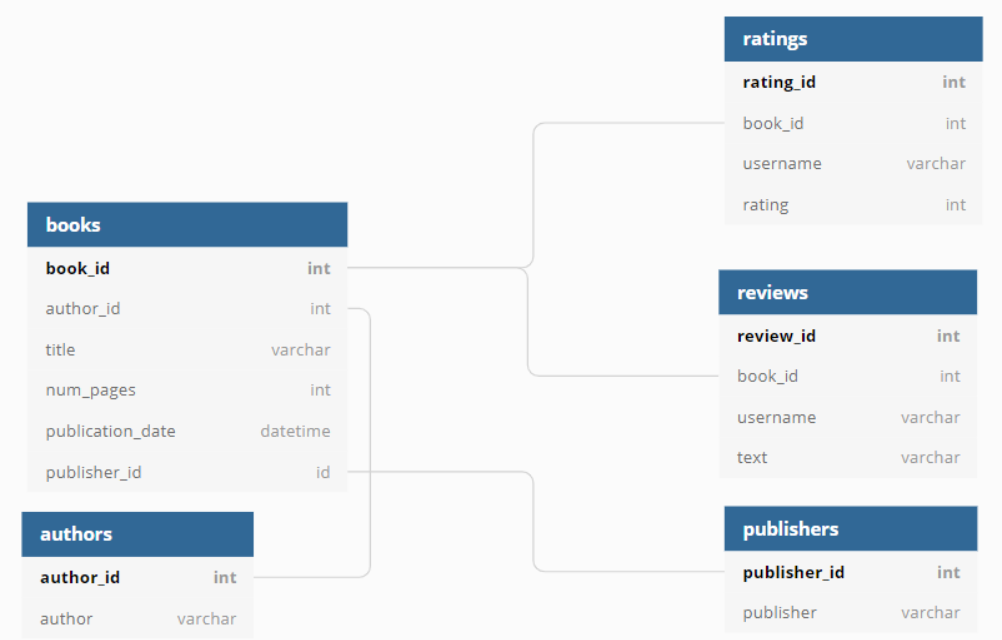
# Задания
- Посчитайте, сколько книг вышло после 1 января 2000 года;
- Для каждой книги посчитайте количество обзоров и среднюю оценку;
- Определите издательство, которое выпустило наибольшее число книг толще 50 страниц — так вы исключите из анализа брошюры;
- Определите автора с самой высокой средней оценкой книг — учитывайте только книги с 50 и более оценками;
- Посчитайте среднее количество обзоров от пользователей, которые поставили больше 50 оценок.

In [1]:
# импортируем библиотеки
import pandas as pd
from sqlalchemy import create_engine

In [2]:
# устанавливаем параметры
db_config = {'user': 'praktikum_student', # имя пользователя
     'pwd': 'Sdf4$2;d-d30pp', # пароль
     'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
     'port': 6432, # порт подключения
     'db': 'data-analyst-final-project-db'} # название базы данных
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
     db_config['pwd'],
     db_config['host'],
     db_config['port'],
     db_config['db'])
# сохраняем коннектор
engine = create_engine(connection_string, connect_args={'sslmode':'require'})

In [3]:
query = ''' SELECT *
            FROM books
            LIMIT 5;
        '''
books = pd.io.sql.read_sql(query, con = engine) 
books

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


Таблица с книгами,автором,названием книг,количеством страниц,датой публикации книги,идентификатором издателя. 6 столбцов 1000 строк.

In [4]:
query = ''' SELECT *
            FROM authors
            LIMIT 5;
        '''
authors = pd.io.sql.read_sql(query, con = engine) 
authors

,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


Таблица с id и именем автора. 2 столбца и 636 строк.

In [5]:
query = ''' SELECT *
            FROM publishers
            LIMIT 5;
        '''
publishers = pd.io.sql.read_sql(query, con = engine) 
publishers

,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


Таблица с id и названием издательства. 2 столбца и 340 строк.

In [6]:
query = ''' SELECT *
            FROM ratings
            LIMIT 5;
        '''
ratings = pd.io.sql.read_sql(query, con = engine) 
ratings

,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


Таблица с идентификатором оценки,идентификатором книги,именем пользователя(оставившего оценку),оценками книг. 4 столбца,6456 строк.

In [7]:
query = ''' SELECT *
            FROM reviews
            LIMIT 5;
        '''
reviews = pd.io.sql.read_sql(query, con = engine) 
reviews

,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


Таблица с идентификатором обзора,идентификатором книг,именем автора обзора,текстом обзора. 4 столбца и 2793 строки.

- Посчитайте, сколько книг вышло после 1 января 2000 года

In [8]:
query = ''' SELECT COUNT(*)
            FROM books
            WHERE publication_date > '2000-01-01';
        '''
publication = pd.io.sql.read_sql(query, con = engine)
publication

,count
0,819


После 1 января вышло 819 книг.

- Для каждой книги посчитайте количество обзоров и среднюю оценку

In [9]:
query = ''' SELECT books.book_id,
                   books.title,
                   SUBQ1.cnt_review as reviews,
                   SUBQ2.average_rating as avg_rating
            FROM books 
            LEFT JOIN(
                SELECT book_id,
                       COUNT(review_id) as cnt_review
                FROM reviews
                GROUP BY book_id) as SUBQ1 ON SUBQ1.book_id = books.book_id
            LEFT JOIN (
                SELECT book_id,
                       AVG(rating) as average_rating
                FROM ratings
                GROUP BY book_id) as SUBQ2 ON SUBQ2.book_id = books.book_id
            ORDER BY avg_rating DESC,
                     reviews DESC
            LIMIT 5 ; 
         ''' 

reviews_avg_rating = pd.io.sql.read_sql(query, con = engine)
reviews_avg_rating.round(1)

,book_id,title,reviews,avg_rating
0,672,The Cat in the Hat and Other Dr. Seuss Favorites,NaN,5.0
1,17,A Dirty Job (Grim Reaper #1),4.0,5.0
2,444,Moneyball: The Art of Winning an Unfair Game,3.0,5.0
3,553,School's Out—Forever (Maximum Ride #2),3.0,5.0
4,699,The Demon-Haunted World: Science as a Candle i...,2.0,5.0


Топ 5  по количеству обзоров. Лидер The Cat in the Hat and Other Dr. Seuss Favorites с пропуском в просмотрах и средней оценкой 5.

- Определите издательство, которое выпустило наибольшее число книг толще 50 страниц — так вы исключите из анализа брошюры

In [10]:
query = ''' SELECT publishers.publisher_id, 
                   publishers.publisher, 
                   COUNT(books.book_id) as cnt_books
            FROM publishers
            LEFT JOIN books ON publishers.publisher_id = books.publisher_id
            WHERE books.num_pages > 50
            GROUP BY publishers.publisher_id
            ORDER BY cnt_books DESC
            LIMIT 5;
          '''
pages50 = pd.io.sql.read_sql(query, con = engine)
pages50

,publisher_id,publisher,cnt_books
0,212,Penguin Books,42
1,309,Vintage,31
2,116,Grand Central Publishing,25
3,217,Penguin Classics,24
4,35,Bantam,19


Топ 5 названий издательств,выпустившие наибольшее число книг толще 50 страниц. Лидер издательство Penguin Books,у него выпущено 42 книги.

- Определите автора с самой высокой средней оценкой книг — учитывайте только книги с 50 и более оценками

In [11]:
query = '''SELECT authors.author_id, 
                  authors.author, 
                  AVG(avg_rating) as average_rating
           FROM authors
           LEFT JOIN books ON books.author_id = authors.author_id
           LEFT JOIN(
                    SELECT books.book_id, 
                           books.title, 
                           COUNT(rating_id) as cnt_ratings, 
                           AVG (rating) as avg_rating
                    FROM books
                    LEFT JOIN ratings ON ratings.book_id = books.book_id
                    GROUP BY books.book_id, 
                             books.title) as SUBQ ON SUBQ.book_id = books.book_id
            WHERE cnt_ratings >= 50
            GROUP BY authors.author_id, 
                     authors.author
            ORDER BY average_rating DESC
            LIMIT 5;
        '''
ratings50 = pd.io.sql.read_sql(query, con = engine)
ratings50.round(2)

,author_id,author,average_rating
0,236,J.K. Rowling/Mary GrandPré,4.28
1,402,Markus Zusak/Cao Xuân Việt Khương,4.26
2,240,J.R.R. Tolkien,4.26
3,376,Louisa May Alcott,4.19
4,498,Rick Riordan,4.08


Топ 5 авторов с самой высокой средней оценкой,учитывая 50 и более оценок. Лидер J.K. Rowling/Mary GrandPré с оценкой 4.28.

- Посчитайте среднее количество обзоров от пользователей, которые поставили больше 50 оценок.

In [12]:
query = ''' SELECT AVG(SUBQ.cnt_reviews)
            FROM
                (SELECT username,
                        COUNT(review_id) as cnt_reviews
                 FROM reviews
                 WHERE username IN 
                         (SELECT username
                          FROM ratings
                          GROUP BY username
                          HAVING COUNT(rating_id) > 50)
             GROUP BY username) as SUBQ; 
         '''
username = pd.io.sql.read_sql(query, con = engine)
username.round(2)

,avg
0,24.33


24.3 cреднее количество обзоров от пользователей,которые поставили больше 50 оценок.

Мы проанализировали базу данных 5 таблиц с информацией о книгах, издательствах, авторах, а также пользовательскими обзорами книг.

**Вопрос-ответ:**❓❗
- ❓Посчитайте, сколько книг вышло после 1 января 2000 года - ❗вышло 819 книг.
- ❓Для каждой книги посчитайте количество обзоров и среднюю оценку - ❗Лидер The Cat in the Hat and Other Dr. Seuss Favorites с пропуском в просмотрах и средней оценкой 5.
- ❓Определите издательство, которое выпустило наибольшее число книг толще 50 страниц — так вы исключите из анализа брошюры - ❗Лидер издательство Penguin Books,у него выпущено 42 книги.
- ❓Определите автора с самой высокой средней оценкой книг — учитывайте только книги с 50 и более оценками - ❗Лидер J.K. Rowling/Mary GrandPré с оценкой 4.28.
- ❓Посчитайте среднее количество обзоров от пользователей, которые поставили больше 50 оценок - ❗24.3.